## analiza SVC

In [1]:
%load_ext autoreload
%autoreload 2
random_state = 42
import sys
sys.path.append("..")
import scripts.data_utils as dutils

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data = pd.read_csv('../data_for_modeling/dataset_sample_30_percent.csv')
data.head()

,text,fake
0,"A video showing a smokenado, a tornado-shaped ...",0
1,Photograph shows a breast rash caused by South...,1
2,Pfizer CEO is still not vaccinated,1
3,Steven Seagal receives Russian citizenship on ...,0
4,Mitt Romney drove to Canada with the family do...,0


In [4]:
# wybrany wczesniej vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=7, max_df=0.7)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['fake'], test_size=0.2, random_state=random_state, stratify=data['fake'])

vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [5]:
svc = SVC(random_state=random_state)

## szukamy hiperparametrów

In [8]:
params_svc = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svc = GridSearchCV(svc, params_svc, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid_svc.fit(X_train_vec, y_train)

# Wyniki
print(f"Najlepsze parametry: {grid_svc.best_params_}")
print(f"Najlepszy F1-score (walidacja krzyżowa): {grid_svc.best_score_:.4f}")

# Ocena na zbiorze testowym
y_pred_svc = grid_svc.predict(X_test_vec)
print(f"Accuracy na zbiorze testowym: {accuracy_score(y_test, y_pred_svc):.4f}")
print("\nRaport klasyfikacji na zbiorze testowym:")
print(classification_report(y_test, y_pred_svc))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .................................C=1, kernel=linear; total time= 1.0min
[CV] END .................................C=1, kernel=linear; total time= 1.0min
[CV] END .................................C=1, kernel=linear; total time= 1.0min
[CV] END ....................................C=1, kernel=rbf; total time= 1.1min
[CV] END ....................................C=1, kernel=rbf; total time= 1.1min
[CV] END ....................................C=1, kernel=rbf; total time= 1.1min
[CV] END ................................C=10, kernel=linear; total time= 1.2min
[CV] END ................................C=10, kernel=linear; total time= 1.2min
[CV] END ................................C=10, kernel=linear; total time= 1.2min
[CV] END ...................................C=10, kernel=rbf; total time= 2.3min
[CV] END ...................................C=10, kernel=rbf; total time= 1.9min
[CV] END ...................................C=10,

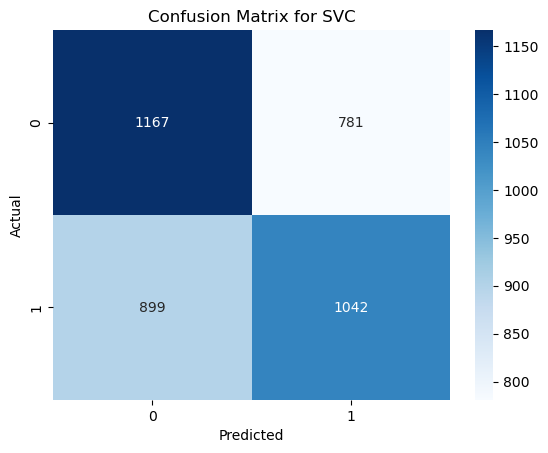

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC')
plt.show()

In [10]:
print(f"Precision: {precision_score(y_test, y_pred_svc):.4f}")


Precision: 0.5716


In [11]:
# wiecej paramsow
svc = SVC(random_state=random_state)

params_svc_advanced = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10],
        'class_weight': ['balanced', None]
    },
    {
        'kernel': ['rbf'],
        'C': [1, 10],
        'gamma': ['scale', 1],
        'class_weight': ['balanced', None]
    }
]

grid_svc_adv = GridSearchCV(svc, params_svc_advanced, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid_svc_adv.fit(X_train_vec, y_train)

print("\n--- Wyniki dla rozszerzonego strojenia SVC ---")
print(f"Najlepsze parametry: {grid_svc_adv.best_params_}")
print(f"Najlepszy F1-score (walidacja krzyżowa): {grid_svc_adv.best_score_:.4f}")

y_pred_svc_adv = grid_svc_adv.predict(X_test_vec)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc_adv):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc_adv):.4f}")
print("\nRaport klasyfikacji na zbiorze testowym:")
print(classification_report(y_test, y_pred_svc_adv))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ..............C=1, class_weight=None, kernel=linear; total time= 1.0min
[CV] END ............C=0.1, class_weight=None, kernel=linear; total time= 1.1min
[CV] END ............C=0.1, class_weight=None, kernel=linear; total time= 1.1min
[CV] END ............C=0.1, class_weight=None, kernel=linear; total time= 1.1min
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time= 1.1min
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time= 1.1min
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time= 1.1min
[CV] END ........C=0.1, class_weight=balanced, kernel=linear; total time= 1.2min
[CV] END ........C=0.1, class_weight=balanced, kernel=linear; total time= 1.2min
[CV] END ........C=0.1, class_weight=balanced, kernel=linear; total time= 1.2min
[CV] END ..............C=1, class_weight=None, kernel=linear; total time= 1.2min
[CV] END ..............C=1, class_weight=None, k

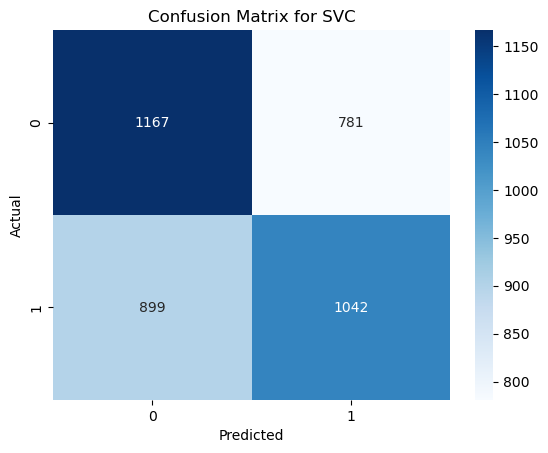

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC')
plt.show()

### poly?

In [14]:
svc = SVC(random_state=random_state)

params_poly = {
    'kernel': ['poly'],
    'C': [1, 10],
    'degree': [2, 3],
    'gamma': ['scale'],
    'coef0': [0, 1]
}

grid_svc_poly = GridSearchCV(svc, params_poly, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid_svc_poly.fit(X_train_vec, y_train)

print("\n--- Wyniki dla SVC poly ---")
print(f"Najlepsze parametry: {grid_svc_poly.best_params_}")
print(f"Najlepszy F1-score (walidacja krzyżowa): {grid_svc_poly.best_score_:.4f}")

y_pred_svc_poly = grid_svc_poly.predict(X_test_vec)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc_poly):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc_poly):.4f}")
print("\nRaport klasyfikacji na zbiorze testowym:")
print(classification_report(y_test, y_pred_svc_poly))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...C=1, coef0=0, degree=2, gamma=scale, kernel=poly; total time= 1.2min
[CV] END ...C=1, coef0=0, degree=2, gamma=scale, kernel=poly; total time= 1.3min
[CV] END ...C=1, coef0=0, degree=2, gamma=scale, kernel=poly; total time= 1.3min
[CV] END ...C=1, coef0=0, degree=3, gamma=scale, kernel=poly; total time= 1.7min
[CV] END ...C=1, coef0=0, degree=3, gamma=scale, kernel=poly; total time= 1.8min
[CV] END ...C=1, coef0=1, degree=2, gamma=scale, kernel=poly; total time= 1.9min
[CV] END ...C=1, coef0=1, degree=2, gamma=scale, kernel=poly; total time= 1.9min
[CV] END ...C=1, coef0=1, degree=2, gamma=scale, kernel=poly; total time= 1.9min
[CV] END ...C=1, coef0=0, degree=3, gamma=scale, kernel=poly; total time= 1.9min
[CV] END ...C=1, coef0=1, degree=3, gamma=scale, kernel=poly; total time= 3.0min
[CV] END ..C=10, coef0=0, degree=2, gamma=scale, kernel=poly; total time= 2.6min
[CV] END ..C=10, coef0=0, degree=2, gamma=scale, 

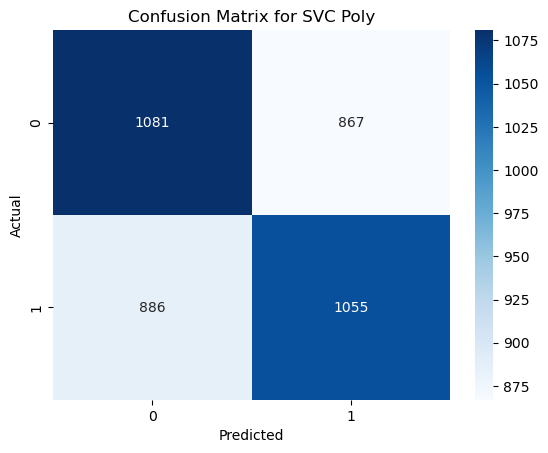

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc_poly), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC Poly')
plt.show()